# The role of unsupervised machine learning algorithms in the luxury goods market


_Description: The assignment is a written report describing the application of 2 machine learning
algorithms to a dataset describing a real-world problem. The performance of the chosen machine
learning algorithms will be critically appraised within the context of the chosen problem with emphasis
on the usefulness of the results obtained; model, data and computational limitations; areas for future
improvements; reproducibility of experiments, etc._

|Cover Sheet||
| -- | -- |
|**Student Number:**|209127564|
|**Programme:**|Data Science Degree Apprenticeship |
|**Module Tutor:**|Dr Uche Onyekpe|
|**Module Code:**|DSC5007M|
|**Module Title:**|Applied Machine Learning|

## Abstract
- Research problem 
- objectives
- Methods
- Key results / arguments
- conclusion 
## 1. Introduction
## 2. Data 
## 2.1. Packages
## 2.2. Algorithms
## 2.3. Metrics
## 2.4. Data pre-processing
## 3. Results
## 4. Conclusion
## References (bibtex)
## Appendix A (full code)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cluster as cluster
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from datetime import date
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

pd.set_option('display.max_columns', None)

# Pre processing

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df = df.drop(columns = ['Z_CostContact','Z_Revenue','Response'])
df.shape

(2240, 26)

In [3]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
dtype: object

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
dtype: int64

In [5]:
df.dropna(subset=['Income'], inplace=True)

In [6]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
dtype: int64

In [7]:
current_year = date.today().year
df['Age'] = current_year - df['Year_Birth']

In [92]:
df.drop(df[df.Age > 70].index, inplace=True)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,5582.083497,1970.701866,51574.222004,0.462672,0.502947,49.105599,295.895383,25.937623,163.022593,36.750000,26.609037,43.388998,2.357073,4.022593,2.601670,5.727898,5.387525,0.074656,0.071709,0.070236,0.060904,0.014735,0.008350,51.298134
std,3251.201752,10.414506,25487.906293,0.538522,0.541625,29.135507,334.409804,39.446870,223.420322,54.228716,40.410539,51.365300,1.942592,2.687212,2.922585,3.231392,2.397505,0.262900,0.258069,0.255607,0.239212,0.120519,0.091017,10.414506
min,0.000000,1952.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
25%,2801.000000,1962.000000,34572.000000,0.000000,0.000000,24.000000,22.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,5427.000000,1971.000000,50442.000000,0.000000,0.000000,49.000000,163.500000,8.000000,65.000000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,8439.750000,1978.000000,67560.750000,1.000000,1.000000,75.000000,490.000000,32.250000,221.250000,46.000000,32.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1492.000000,199.000000,1725.000000,259.000000,198.000000,321.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2036 non-null   int64  
 1   Year_Birth           2036 non-null   int64  
 2   Education            2036 non-null   object 
 3   Marital_Status       2036 non-null   object 
 4   Income               2036 non-null   float64
 5   Kidhome              2036 non-null   int64  
 6   Teenhome             2036 non-null   int64  
 7   Dt_Customer          2036 non-null   object 
 8   Recency              2036 non-null   int64  
 9   MntWines             2036 non-null   int64  
 10  MntFruits            2036 non-null   int64  
 11  MntMeatProducts      2036 non-null   int64  
 12  MntFishProducts      2036 non-null   int64  
 13  MntSweetProducts     2036 non-null   int64  
 14  MntGoldProds         2036 non-null   int64  
 15  NumDealsPurchases    2036 non-null   i

<AxesSubplot:>

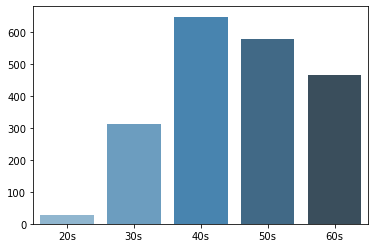

In [9]:
age_20s = df.Age[(df.Age >= 21) & (df.Age <= 30)]
age_30s = df.Age[(df.Age >= 31) & (df.Age <= 40)]
age_40s = df.Age[(df.Age >= 41) & (df.Age <= 50)]
age_50s = df.Age[(df.Age >= 51) & (df.Age <= 60)]
age_60s = df.Age[(df.Age >= 61) & (df.Age <= 70)]

age_x = ["20s", "30s", "40s", "50s", "60s"]
age_y = [len(age_20s.values),len(age_30s.values),len(age_40s.values), len(age_50s.values), len(age_60s.values)]

sns.barplot(x=age_x, y=age_y, data=df, palette="Blues_d")

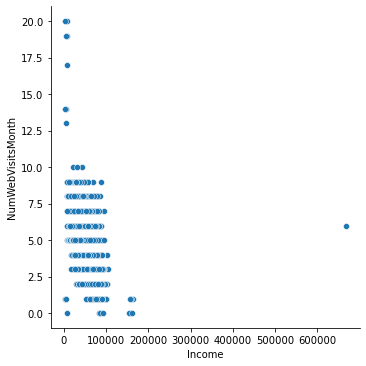

In [10]:
sns.relplot(x="Income", y="NumWebVisitsMonth", data=df)

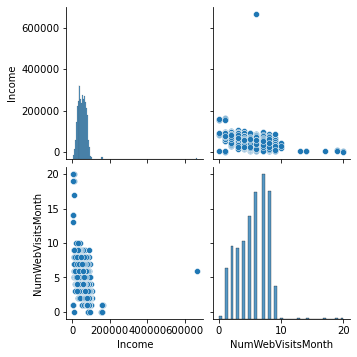

In [11]:
sns.pairplot(df[['Income','NumWebVisitsMonth']])

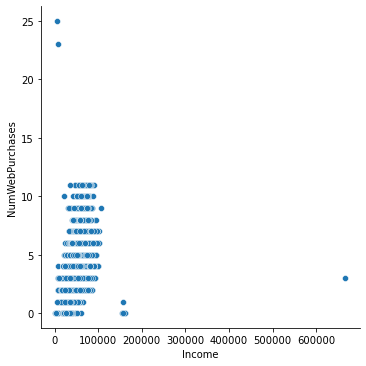

In [12]:
sns.relplot(x="Income", y="NumWebPurchases", data=df)

In [13]:
df['Income'].value_counts() # 0 - 20k, 21 - 30k, 31- 40k, 41-50k, 51-60k, 61-70k, 71-80k

7500.0     12
35860.0     4
34176.0     3
48432.0     3
18929.0     3
           ..
72258.0     1
51124.0     1
74250.0     1
40760.0     1
52869.0     1
Name: Income, Length: 1816, dtype: int64

<AxesSubplot:>

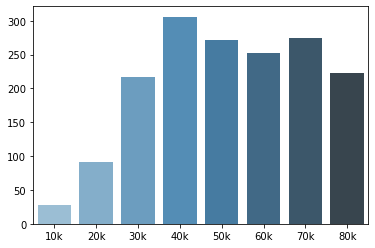

In [14]:
band_0 = df.Income[(df.Income >= 1000) & (df.Income <= 10000)]
band_1 = df.Income[(df.Income >= 11000) & (df.Income <= 20000)]
band_2 = df.Income[(df.Income >= 21000) & (df.Income <= 30000)]
band_3 = df.Income[(df.Income >= 31000) & (df.Income <= 40000)]
band_4 = df.Income[(df.Income >= 41000) & (df.Income <= 50000)]
band_5 = df.Income[(df.Income >= 51000) & (df.Income <= 60000)]
band_6 = df.Income[(df.Income >= 61000) & (df.Income <= 70000)]
band_7 = df.Income[(df.Income >= 71000) & (df.Income <= 80000)]


income_x = ["10k", "20k", "30k", "40k", "50k", "60k", "70k", "80k"]
income_y = [len(band_0.values),len(band_1.values),len(band_2.values), len(band_3.values), len(band_4.values), len(band_5.values), len(band_6.values), len(band_7.values)]

sns.barplot(x=income_x, y=income_y, data=df, palette="Blues_d")


# Clustering

In [15]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age'],
      dtype='object')

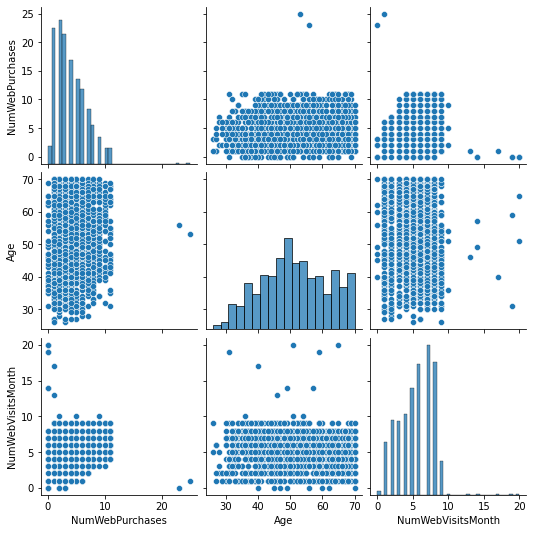

In [16]:
sns.pairplot(df[['NumWebPurchases','Age','NumWebVisitsMonth']])

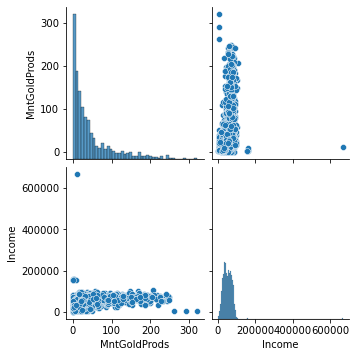

In [17]:
sns.pairplot(df[['MntGoldProds','Income']])

In [18]:
df_luxury = df[['MntGoldProds','Income']] 
df_luxury

,MntGoldProds,Income
0,88,58138.0
1,6,46344.0
2,42,71613.0
3,5,26646.0
4,15,58293.0
...,...,...
2234,9,34421.0
2235,247,61223.0
2237,24,56981.0
2238,61,69245.0


Text(0.5, 1.0, 'Luxury goods Elbow method cluster analysis')

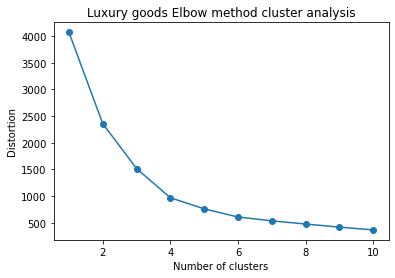

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

scaler = StandardScaler()
scaler.fit(df_luxury)

# distortion score
dist  = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(scaler.transform(df_luxury))
    dist.append(km.inertia_)
    
plt.plot(range(1,11), dist, marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Luxury goods Elbow method cluster analysis')

the line is the mean value of observations and when each part crosses the line, it's a good sign. All parts/ clusters should be above the line. look. for the peak in silhouette scores to show which is the optimum k value

For n_clusters = 2 The average silhouette_score is : 0.6048390257179977
For n_clusters = 3 The average silhouette_score is : 0.6097201874233673
For n_clusters = 4 The average silhouette_score is : 0.5409345728054036
For n_clusters = 5 The average silhouette_score is : 0.5330241483631203
For n_clusters = 6 The average silhouette_score is : 0.5405689180023486


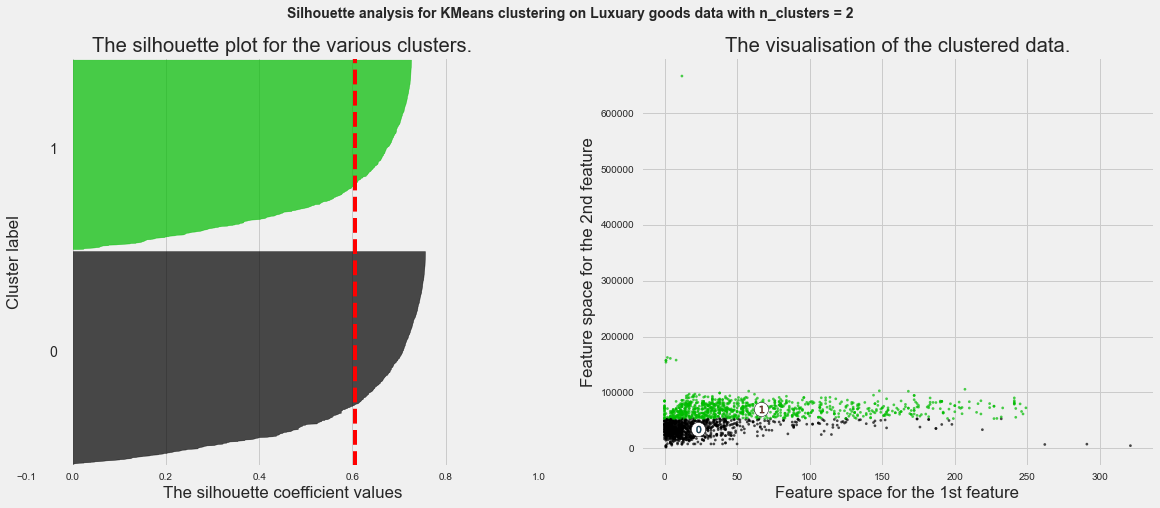

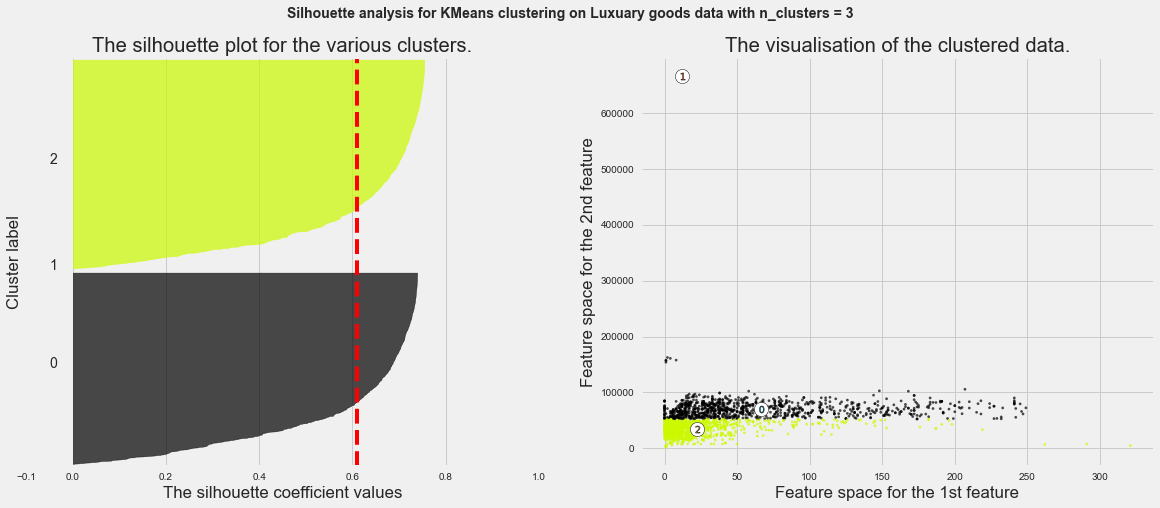

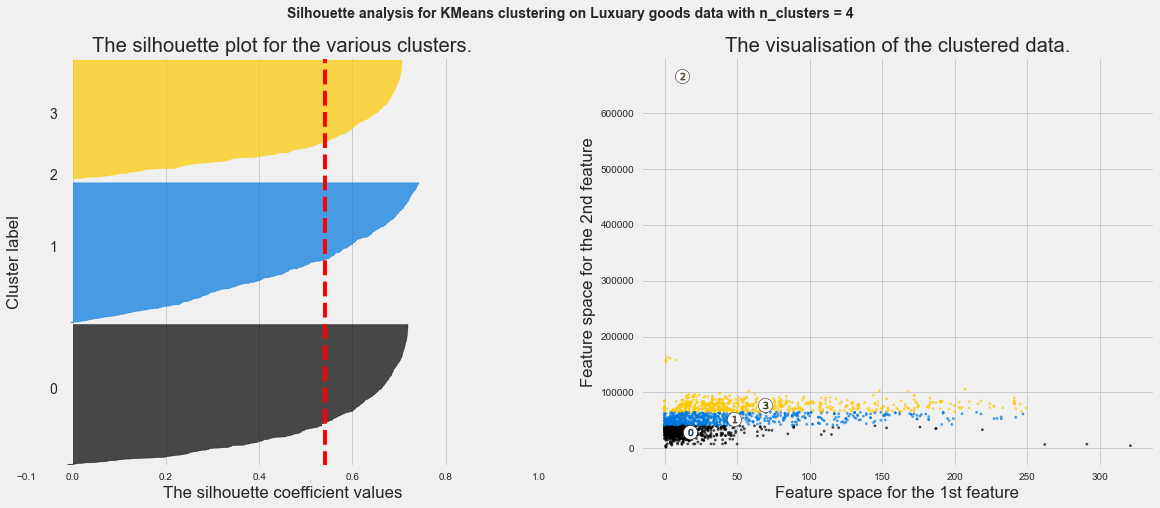

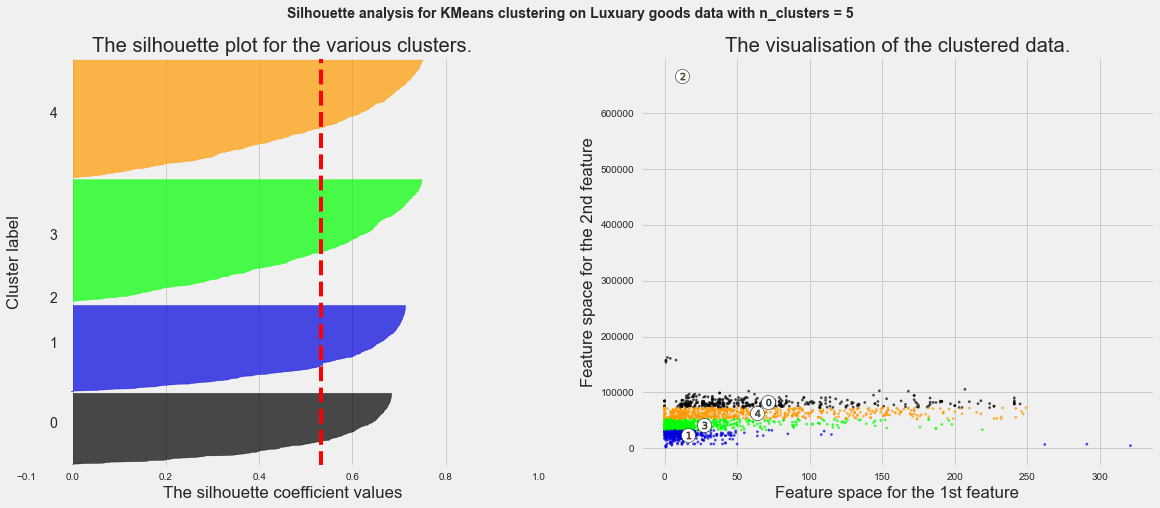

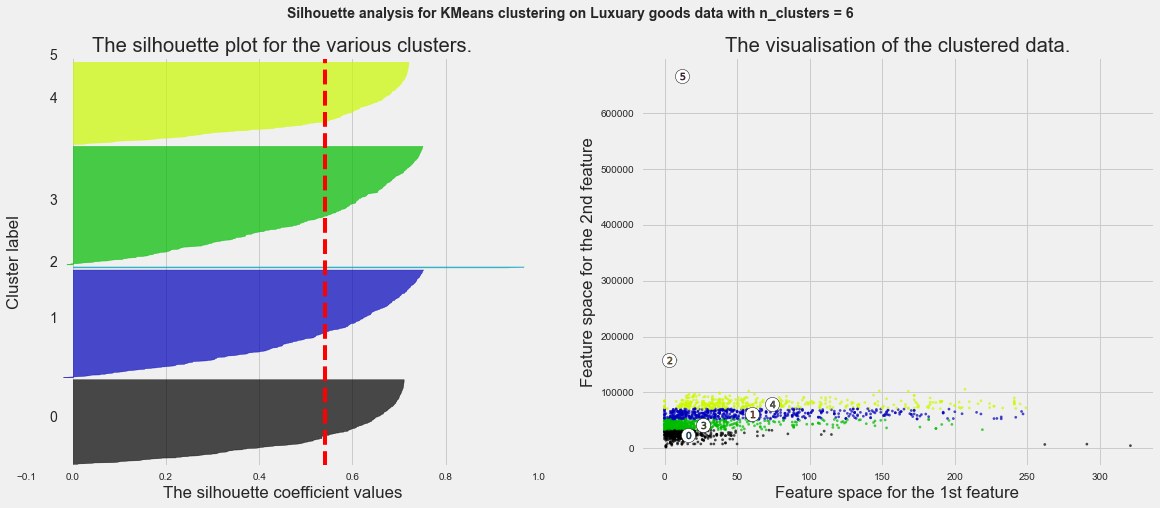

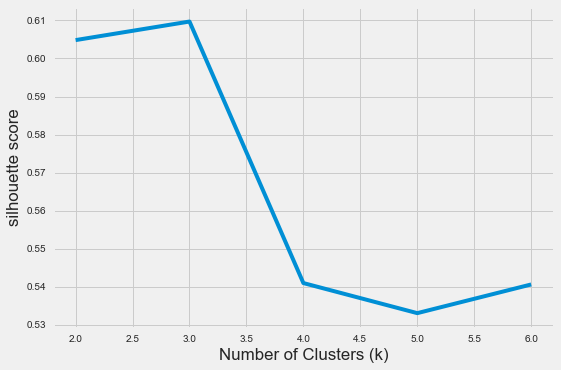

In [39]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_luxury) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df_luxury)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_luxury, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_luxury, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_luxury.iloc[:, 0], df_luxury.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualisation of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on Luxuary goods data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [36]:
 round(0.6048390257179977,3)

0.605

In [37]:
round(0.6097201874233673,3)

0.61

In [38]:
if 0.6097201874233673 > 0.6048390257179977:
    print('yes')

yes


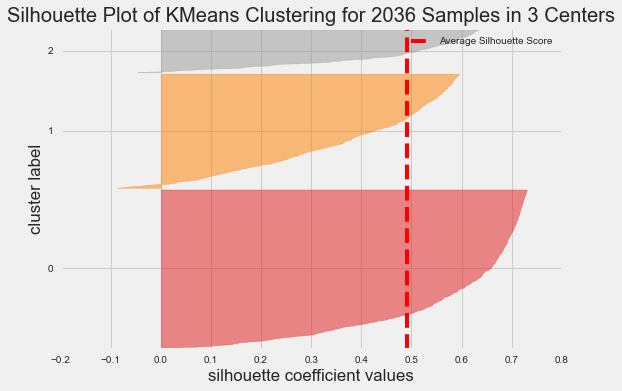

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2036 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

visualiser = SilhouetteVisualizer(KMeans(3))

visualiser.fit(scaler.transform(df_luxury))
visualiser.poof()

In [54]:
import sklearn.metrics as metrics

for i in range(2,11):
    labels=cluster.KMeans(n_clusters=i, init="k-means++",random_state=200).fit(df_luxury).labels_
    print("silhoutte score for k(clusters)= " +str(i)+ " is "
         +str(metrics.silhouette_score(df_luxury,labels, metric="euclidean", sample_size=1000, random_state=200)))

silhoutte score for k(clusters)= 2 is 0.6026494466245286
silhoutte score for k(clusters)= 3 is 0.6136564308898018
silhoutte score for k(clusters)= 4 is 0.5371741642296779
silhoutte score for k(clusters)= 5 is 0.5275613573671118
silhoutte score for k(clusters)= 6 is 0.5367819071498636
silhoutte score for k(clusters)= 7 is 0.546654530686837
silhoutte score for k(clusters)= 8 is 0.5320090207020851
silhoutte score for k(clusters)= 9 is 0.5100081201728549
silhoutte score for k(clusters)= 10 is 0.5276881059005133


In [41]:
k_means = KMeans(n_clusters=3)

label = k_means.fit_predict(df_luxury)

print(label) # divided into 3 clusters

[0 1 0 ... 0 0 0]


In [42]:
print(k_means.cluster_centers_)

[[6.62197125e+01 6.99875400e+04]
 [2.24599434e+01 3.40910330e+04]
 [1.20000000e+01 6.66666000e+05]]


In [47]:
k_means = cluster.KMeans(n_clusters=3, init="k-means++")

k_means = k_means.fit_predict(df_luxury)


In [67]:
df_luxury['Clusters'] = label
df_luxury['Clusters']

/Users/marie-louise/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       0
1       1
2       0
3       1
4       0
       ..
2234    1
2235    0
2237    0
2238    0
2239    0
Name: Clusters, Length: 2036, dtype: int32

<AxesSubplot:xlabel='MntGoldProds', ylabel='Income'>

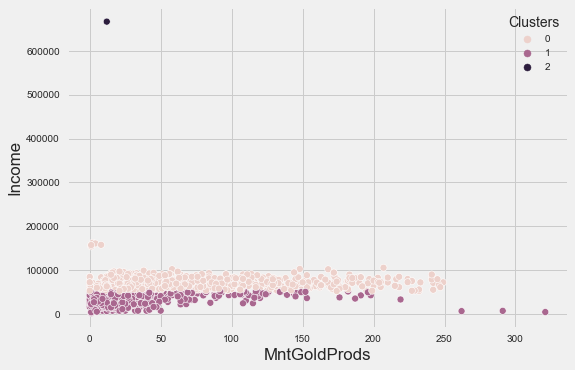

In [68]:
sns.scatterplot(x="MntGoldProds", y="Income", hue="Clusters", data=df_luxury)

# DBSCAN Clustering
density-bases spatial clustering of applications with noise

In [94]:
from sklearn.cluster import DBSCAN
from collections import Counter
import numpy as np
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

%matplotlib inline

- epsilom is the distance around each object
- minimum points is the number of points that must exist within epsilon distance from the point

In [72]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df = df.drop(columns = ['Z_CostContact','Z_Revenue','Response'])
df.shape
df.isnull().sum()

df.dropna(subset=['Income'], inplace=True)

df.isnull().sum()

current_year = date.today().year
df['Age'] = current_year - df['Year_Birth']

df.drop(df[df.Age > 70].index, inplace=True)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,5582.083497,1970.701866,51574.222004,0.462672,0.502947,49.105599,295.895383,25.937623,163.022593,36.750000,26.609037,43.388998,2.357073,4.022593,2.601670,5.727898,5.387525,0.074656,0.071709,0.070236,0.060904,0.014735,0.008350,51.298134
std,3251.201752,10.414506,25487.906293,0.538522,0.541625,29.135507,334.409804,39.446870,223.420322,54.228716,40.410539,51.365300,1.942592,2.687212,2.922585,3.231392,2.397505,0.262900,0.258069,0.255607,0.239212,0.120519,0.091017,10.414506
min,0.000000,1952.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
25%,2801.000000,1962.000000,34572.000000,0.000000,0.000000,24.000000,22.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000
50%,5427.000000,1971.000000,50442.000000,0.000000,0.000000,49.000000,163.500000,8.000000,65.000000,12.000000,8.000000,24.000000,2.000000,3.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
75%,8439.750000,1978.000000,67560.750000,1.000000,1.000000,75.000000,490.000000,32.250000,221.250000,46.000000,32.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1492.000000,199.000000,1725.000000,259.000000,198.000000,321.000000,15.000000,25.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000


In [96]:
df_luxury_1 = df[['MntGoldProds','Income']] 

In [95]:
df_luxury_1.head()

,MntGoldProds,Income
0,88,58138.0
1,6,46344.0
2,42,71613.0
3,5,26646.0
4,15,58293.0


In [97]:
df_luxury_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2036 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MntGoldProds  2036 non-null   int64  
 1   Income        2036 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 112.3 KB


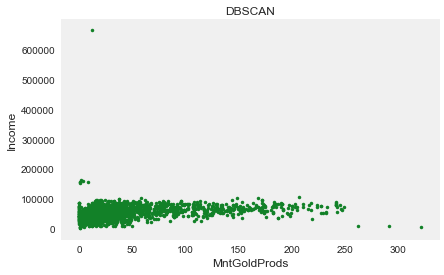

In [98]:
__ = plt.plot(df_luxury_1['MntGoldProds'], df_luxury_1['Income'],
        marker ='.', linewidth=0, color = '#128128')
__ = plt.grid(which='major', color='#cccccc', alpha=0.45)
__ = plt.title('DBSCAN', fontsize=12)
__ = plt.xlabel('MntGoldProds')
__ = plt.ylabel('Income')
__ = plt.show()

In [100]:
# convert to numpy array
dbscan_df = df_luxury_1[['MntGoldProds', 'Income']]
dbscan_df = dbscan_df.values.astype('float32', copy=False)
dbscan_df

array([[8.8000e+01, 5.8138e+04],
       [6.0000e+00, 4.6344e+04],
       [4.2000e+01, 7.1613e+04],
       ...,
       [2.4000e+01, 5.6981e+04],
       [6.1000e+01, 6.9245e+04],
       [2.1000e+01, 5.2869e+04]], dtype=float32)

In [101]:
# normalise 

dbscan_df_scaler = StandardScaler().fit(dbscan_df)
dbscan_df = dbscan_df_scaler.transform(dbscan_df)
dbscan_df

array([[ 0.86871797,  0.25758845],
       [-0.72808266, -0.20525448],
       [-0.02704821,  0.78640044],
       ...,
       [-0.3775654 ,  0.21218322],
       [ 0.34294218,  0.6934708 ],
       [-0.43598497,  0.05081218]], dtype=float32)

In [105]:
# construct model

model = DBSCAN(eps = 0.25, min_samples = 12, metric = 'euclidean').fit(dbscan_df)
model

DBSCAN(eps=0.25, min_samples=12)

In [113]:
# separate outliers from clusted data

outliers_df = df_luxury_1[model.labels_ == -1]# -1 is for outliers
clusters_df = df_luxury_1[model.labels_ != -1]

colours = model.labels_
colours_clusters = colours[colours != -1]
colours_outliers = 'black'

# clusters info
clusters = Counter(model.labels_)
print(clusters)
print(df_luxury_1[model.labels_== -1].head())
print('Number of clusters = {}'.format(len(clusters)-1))

Counter({0: 1933, -1: 95, 1: 8})
     MntGoldProds    Income
46             50    7500.0
53            241   82582.0
117           120   36550.0
124           168  101970.0
126           216   79607.0
Number of clusters = 2


In [106]:
#print labels
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

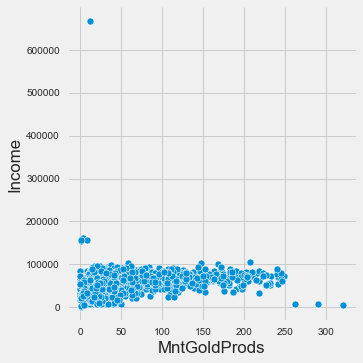

In [82]:
sns.relplot(x="MntGoldProds", y="Income", data=df_luxury_1)

## Attributes

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.



**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month



investigate

- Recency: Number of days since customer's last purchase
- NumWebPurchases: Number of purchases made through the company’s website
- NumStorePurchases: Number of purchases made directly in stores





In [ ]:
sns.catplot(x='Education', y='NumWebVisitsMonth', kind="swarm", data=df)

In [ ]:
sns.catplot(x='Education', y='NumStorePurchases', kind="swarm", data=df)

In [ ]:
sns.pairplot(df[['NumStorePurchases','Age', 'NumWebVisitsMonth']])

In [ ]:
df_practice = df[['Age','Income','NumStorePurchases']] 
df_practice.count()

In [ ]:
sns.pairplot(df[['MntMeatProducts','MntWines', 'MntGoldProds']])

In [ ]:
k_means = cluster.KMeans(n_clusters=5, init="k-means++") 
k_means = k_means.fit(df[['MntMeatProducts','MntWines']])

In [ ]:
k_means.cluster_centers_

In [ ]:
df['Clusters'] = k_means.labels_

In [ ]:
sns.scatterplot(x='MntMeatProducts',y='MntWines',hue='Clusters', data=df)

In [ ]:
df['Clusters'].value_counts()

In [ ]:
k_means = cluster.KMeans(n_clusters=3, init="k-means++") 
k_means = k_means.fit(df[['MntMeatProducts','MntWines']])
sns.scatterplot(x='MntMeatProducts',y='MntWines',hue='Clusters', data=df)

In [ ]:
sns.pairplot(df[['MntMeatProducts','MntFruits', 'MntWines']])

In [ ]:
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['NumWebVisitsMonth', 'NumStorePurchases']])


# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]


## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [ ]:
sns.pairplot(df[['NumWebPurchases','NumStorePurchases', 'NumWebVisitsMonth']])

In [ ]:
sns.pairplot(df[['NumWebPurchases','NumDealsPurchases','NumStorePurchases']])

In [ ]:
sns.pairplot(df[['NumWebPurchases','NumWebVisitsMonth','NumStorePurchases']])

In [ ]:
plt.scatter(df.NumWebVisitsMonth, df.NumStorePurchases, c=df.c, alpha = 0.6, s=10)

In [ ]:
df['NumStorePurchases'].sum()

In [ ]:
df['NumWebPurchases'].sum()

In [ ]:
plt.scatter(df['NumWebVisitsMonth'],df['NumStorePurchases'])

In [ ]:
plt.scatter(df['NumWebVisitsMonth'],df['NumWebPurchases'])

In [ ]:
doctoral_students = df['Education']== 'PhD'

In [ ]:
df_doctoral['NumWebPurchases'].sum()

In [ ]:
df_doctoral['NumStorePurchases'].sum()

In [ ]:
df_doctoral = df[doctoral_students]

In [ ]:
df_doctoral['Marital_Status'].value_counts()

In [ ]:
df_doctoral['Kidhome'].value_counts()

In [ ]:
df_doctoral['Teenhome'].value_counts()

In [ ]:
plt.scatter(df_doctoral['NumWebVisitsMonth'],df_doctoral['NumStorePurchases'])

In [ ]:
plt.scatter(df_doctoral['MntFruits'],df_doctoral['Income'])

In [ ]:
plt.scatter(df_doctoral['Year_Birth'],df_doctoral['Income'], df_doctoral['NumDealsPurchases'] )

In [ ]:
df[doctoral_students][['Marital_Status','Recency','NumWebPurchases']] 